<a href="https://colab.research.google.com/github/adityakulkarni0910/Deep_Learning_CIFAR10/blob/main/Deep_Learning_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path

In [ ]:
folder = Path('/content/drive/My Drive/Study/DL/HW4')

# Loading and Processing Data 

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

   
# define transformation
data_transformer = transforms.Compose([transforms.ToTensor()])
    
# loading data
train0_ds=datasets.CIFAR10(folder, train=True, download=True,transform=data_transformer)

# print out data shape
print(train0_ds.data.shape)

Files already downloaded and verified
(50000, 32, 32, 3)


## Next, split the indices of train0_ds into two groups:

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=list(range(len(train0_ds)))
y_test0=[y for _,y in train0_ds]
for train_index, val_index in sss.split(indices, y_test0):
    print("train:", train_index, "val:", val_index)
    print(len(val_index),len(train_index))

train: [25283 41058 20536 ... 29153 41456 11622] val: [40186 33482 35563 ... 34231 29571 11114]
10000 40000


## Create Validation and test dataset

In [ ]:
from torch.utils.data import Subset

val_ds=Subset(train0_ds,val_index)
train_ds=Subset(train0_ds,train_index)

## Count number of images per category

In [ ]:
import collections

# get labels
y_train=[y for _,y in train_ds]

# count labels
counter_train=collections.Counter(y_train)
print(counter_train)

Counter({7: 4000, 4: 4000, 1: 4000, 5: 4000, 6: 4000, 8: 4000, 9: 4000, 0: 4000, 3: 4000, 2: 4000})


In [ ]:
# loading data
test_ds=datasets.CIFAR10(folder, train=False, download=True,transform=data_transformer)
print(test_ds.data.shape)

Files already downloaded and verified
(10000, 32, 32, 3)


## count the number of images per class in val_ds and test_ds

In [ ]:
import collections
import numpy as np

# get labels
y_test=[y for _,y in test_ds]
y_val=[y for _,y in val_ds]

counter_test=collections.Counter(y_test)
counter_val=collections.Counter(y_val)

print(counter_test)
print(counter_val)

Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})
Counter({4: 1000, 3: 1000, 2: 1000, 8: 1000, 5: 1000, 7: 1000, 6: 1000, 0: 1000, 9: 1000, 1: 1000})


##  Show a few sample images from train_ds

image indices: [ 2732 21243 30403 32103]
torch.Size([3, 36, 138])


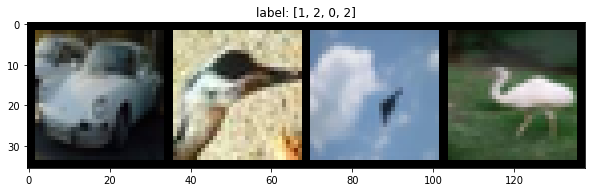

In [ ]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# fix random seed
np.random.seed(0)

def show(img,y=None,color=True):
    npimg = img.numpy()
    npimg_tr=np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)
    if y is not None:
        plt.title("label: "+str(y))
        
grid_size=4
rnd_inds=np.random.randint(0,len(train_ds),grid_size)
print("image indices:",rnd_inds)

x_grid=[train_ds[i][0] for i in rnd_inds]
y_grid=[train_ds[i][1] for i in rnd_inds]

x_grid=utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)

# call helper function
plt.figure(figsize=(10,10))
show(x_grid,y_grid)

## Show a few sample images from val_ds

image indices: [2732 9845 3264 4859]
torch.Size([3, 36, 138])


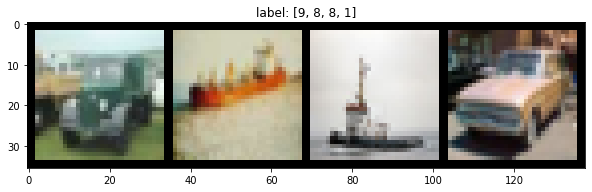

In [ ]:
np.random.seed(0)

grid_size=4
rnd_inds=np.random.randint(0,len(val_ds),grid_size)
print("image indices:",rnd_inds)

x_grid=[val_ds[i][0] for i in rnd_inds]
y_grid=[val_ds[i][1] for i in rnd_inds]

x_grid=utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)

# call helper function
plt.figure(figsize=(10,10))
show(x_grid,y_grid)

## Calculate the mean and standard deviation of train_ds

In [ ]:
import numpy as np

# RGB mean and std 
meanRGB=[np.mean(x.numpy(),axis=(1,2)) for x,_ in train_ds]
stdRGB=[np.std(x.numpy(),axis=(1,2)) for x,_ in train_ds]

meanR=np.mean([m[0] for m in meanRGB])
meanG=np.mean([m[1] for m in meanRGB])
meanB=np.mean([m[2] for m in meanRGB])

stdR=np.mean([s[0] for s in stdRGB])
stdG=np.mean([s[1] for s in stdRGB])
stdB=np.mean([s[2] for s in stdRGB])

print(meanR,meanG,meanB)
print(stdR,stdG,stdB)

0.49180245 0.4824589 0.44694117
0.20215227 0.1992971 0.20079334


## Data Transformation

For test0_ds, we only added the normalization function since we do not require data augmentation for the validation and test datasets

In [ ]:
train_transformer = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  
    transforms.RandomVerticalFlip(p=0.5),  
    transforms.ToTensor(),
    transforms.Normalize([meanR, meanG, meanB], [stdR, stdG, stdB])])
                 

test0_transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([meanR, meanG, meanB], [stdR, stdG, stdB]),
    ])   

In [ ]:
# overwrite the transform functions
# Note that when we update train0_ds.transform function, both val_ds, 
# and train_ds will be updated since they are subsets of train0_ds.
train0_ds.transform=train_transformer
test_ds.transform=test0_transformer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image indices: [ 2732 21243 30403 32103]
torch.Size([3, 36, 138])


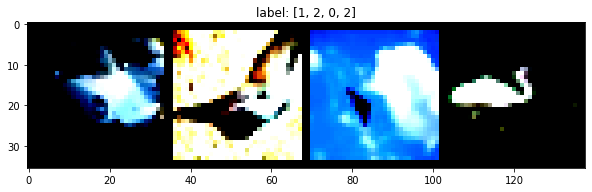

In [ ]:
import torch
np.random.seed(0)
torch.manual_seed(0)

# make a grid
grid_size=4
rnd_inds=np.random.randint(0,len(train_ds),grid_size)
print("image indices:",rnd_inds)

x_grid=[train_ds[i][0] for i in rnd_inds]
y_grid=[train_ds[i][1] for i in rnd_inds]

x_grid=utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)

# call helper function
plt.figure(figsize=(10,10))
show(x_grid,y_grid)


In [ ]:
from torch.utils.data import DataLoader

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=64, shuffle=False)  

In [ ]:
test_dl = DataLoader(test_ds, batch_size=64, shuffle=False)

In [ ]:
# extract a batch from training data
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([32, 3, 32, 32])
torch.Size([32])


In [ ]:
# extract a batch from validation data
for x, y in val_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 3, 32, 32])
torch.Size([64])


# Building Model

In [ ]:
from torchvision import models
import torch

# load model with random weights
model_vgg16 = models.vgg16(pretrained=True)

In [ ]:
print(model_vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# upload model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
from torch import nn
# change the output layer
num_classes=10
#num_ftrs = model_vgg16.Linear.in_features 
model_vgg16.fc = nn.Linear(1000, num_classes)

#device = torch.device("cuda:0")
model_vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Even though the original image sizes are 32*32, we need to resize them to 224*224, 
# the same size that the resnet18/vgg16 model was trained at.
from torchsummary import summary
summary(model_vgg16, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

## Let's visualize the filters of the first CNN layer:

In [ ]:
# get Conv1 weights
for w in model_vgg16.parameters():
    w=w.data.cpu()
    print(w.shape)
    break


torch.Size([64, 3, 3, 3])


In [ ]:
# normalize to [0,1]
min_w=torch.min(w)
w1 = (-1/(2*min_w))*w + 0.5 
print(torch.min(w1).item(),torch.max(w1).item())

0.0 0.9217420220375061


torch.Size([3, 33, 33])


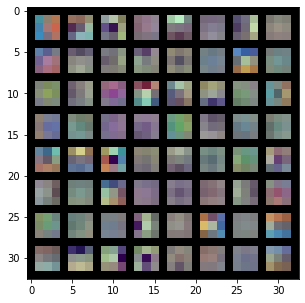

In [ ]:
# make a grid
grid_size=len(w1)
x_grid=[w1[i] for i in range(grid_size)]
x_grid=utils.make_grid(x_grid, nrow=8, padding=1)
print(x_grid.shape)

# call helper function
plt.figure(figsize=(5,5))
show(x_grid)

# Define Loss Function

In [ ]:
loss_func = nn.CrossEntropyLoss(reduction="sum",)

# Defining Optimizer

In [ ]:
from torch import optim
opt = optim.Adam(model_vgg16.parameters(), lr=1e-4)

In [ ]:
# get learning rate 
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0001


In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR

# define learning rate scheduler

lr_scheduler = CosineAnnealingLR(opt,T_max=2,eta_min=1e-5)

In [ ]:
lrs=[]
for i in range(10):
    lr_scheduler.step()
    lr=get_lr(opt)
    print("epoch %s, lr: %.1e" %(i,lr))
    lrs.append(lr)

epoch 0, lr: 5.5e-05
epoch 1, lr: 1.0e-05
epoch 2, lr: 5.5e-05
epoch 3, lr: 1.0e-04
epoch 4, lr: 5.5e-05
epoch 5, lr: 1.0e-05
epoch 6, lr: 5.5e-05
epoch 7, lr: 1.0e-04
epoch 8, lr: 5.5e-05
epoch 9, lr: 1.0e-05


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


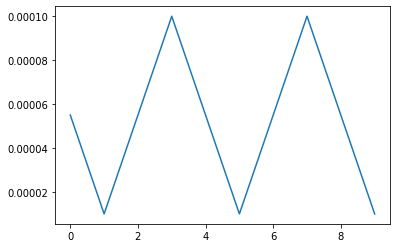

In [ ]:
plt.plot(lrs)

# Training and Transfer Learning

In [ ]:
# A helper function to count the number of correct predictions per data batch:
def metrics_batch(output, target):
    # get output class
    pred = output.argmax(dim=1, keepdim=True)
    
    # compare output class with target class
    corrects=pred.eq(target.view_as(pred)).sum().item()
    return corrects

In [ ]:
# A helper function to compute the loss value per batch of data:
def loss_batch(loss_func, output, target, opt=None):
    
    # get loss 
    loss = loss_func(output, target)
    
    # get performance metric
    metric_b = metrics_batch(output,target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

In [ ]:
# a helper function to compute the loss value and the performance metric for the entire dataset or an epoch.

# define device as a global variable
#device = torch.device("cuda")

def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # move batch to device
        xb=xb.to(device)
        yb=yb.to(device)
        
        # get model output
        output=model(xb)
        
        # get loss per batch
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        
        # update running loss
        running_loss+=loss_b
        
        # update running metric
        if metric_b is not None:
            running_metric+=metric_b

        # break the loop in case of sanity check
        if sanity_check is True:
            break
    
    # average loss value
    loss=running_loss/float(len_data)
    
    # average metric value
    metric=running_metric/float(len_data)
    
    return loss, metric

In [ ]:
def train_val(model, params):
    # extract model parameters
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    # history of loss values in each epoch
    loss_history={
        "train": [],
        "val": [],
    }
    
    # histroy of metric values in each epoch
    metric_history={
        "train": [],
        "val": [],
    }
    
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # initialize best loss to a large value
    best_loss=float('inf')
    
    # main loop
    for epoch in range(num_epochs):
        
        # get current learning rate
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))
        
        # train model on training dataset
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        # collect loss and metric for training dataset
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        # evaluate model on validation dataset    
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
        
       
        # store best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
        
        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)
        
        # learning rate schedule
        lr_scheduler.step()

        print("train loss: %.6f, dev loss: %.6f, accuracy: %.2f" %(train_loss,val_loss,100*val_metric))
        print("-"*10) 

    # load best model weights
    model.load_state_dict(best_model_wts)
        
    return model, loss_history, metric_history

# Task 1

## Freeze classification layer

In [ ]:
#reference: https://spandan-madan.github.io/A-Collection-of-important-tasks-in-pytorch/
model_vgg16_1 = model_vgg16

child_counter = 0
for child in model_vgg16_1.children():
    print(" child", child_counter, "is -")
    print(child)
    child_counter += 1

 child 0 is -
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 

In [ ]:
from torch import nn
# change the output layer
num_classes=10
num_ftrs = model_vgg16_1.fc.in_features 
model_vgg16_1.fc = nn.Linear(num_ftrs, num_classes)

#device = torch.device("cuda:0")
model_vgg16_1.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
from torchsummary import summary
summary(model_vgg16_1, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
count = 0
for child in model_vgg16_1.children():
  count+=1
  if count < 2:
    for param in child.parameters():
        param.requires_grad = False

In [ ]:
import copy


loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model_vgg16_1.parameters(), lr=1e-3)
lr_scheduler = CosineAnnealingLR(opt,T_max=5,eta_min=1e-6)

params_train={
 "num_epochs": 5,
 "optimizer": opt,
 "loss_func": loss_func,
 "train_dl": train_dl,
 "val_dl": val_dl,
 "sanity_check": False,
 "lr_scheduler": lr_scheduler,
 "path2weights": folder / "model_vgg16.pt",
}

# train and validate the model
model_vgg16_1,loss_hist,metric_hist=train_val(model_vgg16_1,params_train)

Epoch 0/4, current lr=0.001
Copied best model weights!
train loss: 0.910704, dev loss: 1.114802, accuracy: 75.72
----------
Epoch 1/4, current lr=0.0009046039886902864
Copied best model weights!
train loss: 0.831934, dev loss: 0.967806, accuracy: 76.12
----------
Epoch 2/4, current lr=0.0006548539886902863
Copied best model weights!
train loss: 0.705468, dev loss: 0.883931, accuracy: 76.59
----------
Epoch 3/4, current lr=0.0003461460113097138
Copied best model weights!
train loss: 0.609842, dev loss: 0.880783, accuracy: 76.19
----------
Epoch 4/4, current lr=9.639601130971379e-05
Copied best model weights!
train loss: 0.561604, dev loss: 0.818587, accuracy: 76.83
----------


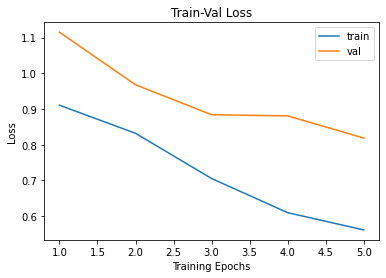

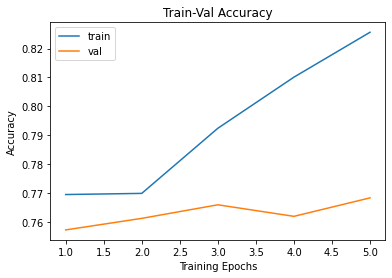

In [ ]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# Task 2

## Unfreeze last CNN block

In [ ]:
#reference: https://spandan-madan.github.io/A-Collection-of-important-tasks-in-pytorch/

model_vgg16_2  = model_vgg16

child_counter = 0
for child in model_vgg16_2.children():
    print(" child", child_counter, "is -")
    print(child)
    child_counter += 1

 child 0 is -
Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 

In [ ]:
child_counter = 0
for child in model_vgg16_2.children():
    if child_counter <1:
        children_of_child_counter = 0
        for children_of_child in child.children():
            if children_of_child_counter < 24:
                for param in children_of_child.parameters():
                    param.requires_grad = False
                print('child ', children_of_child_counter, 'of child',child_counter,' was frozen')
            else:
                for param in children_of_child.parameters():
                    param.requires_grad = True
                print('child ', children_of_child_counter, 'of child',child_counter,' was not frozen')
            children_of_child_counter += 1

    else:
        child.requires_grad = True
        print("child ",child_counter," was not frozen")
    child_counter += 1

child  0 of child 0  was frozen
child  1 of child 0  was frozen
child  2 of child 0  was frozen
child  3 of child 0  was frozen
child  4 of child 0  was frozen
child  5 of child 0  was frozen
child  6 of child 0  was frozen
child  7 of child 0  was frozen
child  8 of child 0  was frozen
child  9 of child 0  was frozen
child  10 of child 0  was frozen
child  11 of child 0  was frozen
child  12 of child 0  was frozen
child  13 of child 0  was frozen
child  14 of child 0  was frozen
child  15 of child 0  was frozen
child  16 of child 0  was frozen
child  17 of child 0  was frozen
child  18 of child 0  was frozen
child  19 of child 0  was frozen
child  20 of child 0  was frozen
child  21 of child 0  was frozen
child  22 of child 0  was frozen
child  23 of child 0  was frozen
child  24 of child 0  was not frozen
child  25 of child 0  was not frozen
child  26 of child 0  was not frozen
child  27 of child 0  was not frozen
child  28 of child 0  was not frozen
child  29 of child 0  was not fro

In [ ]:
import copy

loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model_vgg16_2.parameters(), lr=1e-4)
lr_scheduler = CosineAnnealingLR(opt,T_max=5,eta_min=1e-6)

params_train={
 "num_epochs": 10,
 "optimizer": opt,
 "loss_func": loss_func,
 "train_dl": train_dl,
 "val_dl": val_dl,
 "sanity_check": False,
 "lr_scheduler": lr_scheduler,
 "path2weights": folder / "model_vgg16.pt",
}

# train and validate the model
model_vgg16_2,loss_hist,metric_hist=train_val(model_vgg16_2,params_train)

Epoch 0/9, current lr=0.0001
Copied best model weights!
train loss: 0.840401, dev loss: 0.850434, accuracy: 73.78
----------
Epoch 1/9, current lr=9.05463412215599e-05
Copied best model weights!
train loss: 0.790354, dev loss: 0.838648, accuracy: 74.97
----------
Epoch 2/9, current lr=6.57963412215599e-05
Copied best model weights!
train loss: 0.703015, dev loss: 0.785239, accuracy: 76.15
----------
Epoch 3/9, current lr=3.52036587784401e-05
Copied best model weights!
train loss: 0.594312, dev loss: 0.768924, accuracy: 77.16
----------
Epoch 4/9, current lr=1.0453658778440105e-05
train loss: 0.514154, dev loss: 0.777917, accuracy: 77.92
----------
Epoch 5/9, current lr=1e-06
train loss: 0.481857, dev loss: 0.773885, accuracy: 78.08
----------
Epoch 6/9, current lr=1.0453658778440102e-05
train loss: 0.477301, dev loss: 0.830964, accuracy: 77.87
----------
Epoch 7/9, current lr=3.520365877844011e-05
train loss: 0.515421, dev loss: 0.770771, accuracy: 77.62
----------
Epoch 8/9, current l

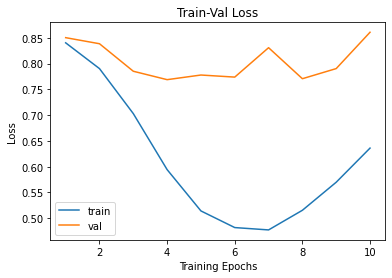

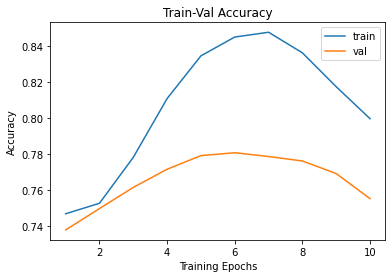

In [ ]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# Task 3

## Unfreeze last two CNN block

In [ ]:
model_vgg16_3 = model_vgg16

child_counter = 0
for child in model_vgg16_3.children():
    if child_counter <1:
        children_of_child_counter = 0
        for children_of_child in child.children():
            if children_of_child_counter < 17:
                for param in children_of_child.parameters():
                    param.requires_grad = False
                print('child ', children_of_child_counter, 'of child',child_counter,' was frozen')
            else:
                for param in children_of_child.parameters():
                    param.requires_grad = True
                print('child ', children_of_child_counter, 'of child',child_counter,' was not frozen')
            children_of_child_counter += 1

    else:
        child.requires_grad = True
        print("child ",child_counter," was not frozen")
    child_counter += 1

child  0 of child 0  was frozen
child  1 of child 0  was frozen
child  2 of child 0  was frozen
child  3 of child 0  was frozen
child  4 of child 0  was frozen
child  5 of child 0  was frozen
child  6 of child 0  was frozen
child  7 of child 0  was frozen
child  8 of child 0  was frozen
child  9 of child 0  was frozen
child  10 of child 0  was frozen
child  11 of child 0  was frozen
child  12 of child 0  was frozen
child  13 of child 0  was frozen
child  14 of child 0  was frozen
child  15 of child 0  was frozen
child  16 of child 0  was frozen
child  17 of child 0  was not frozen
child  18 of child 0  was not frozen
child  19 of child 0  was not frozen
child  20 of child 0  was not frozen
child  21 of child 0  was not frozen
child  22 of child 0  was not frozen
child  23 of child 0  was not frozen
child  24 of child 0  was not frozen
child  25 of child 0  was not frozen
child  26 of child 0  was not frozen
child  27 of child 0  was not frozen
child  28 of child 0  was not frozen
child

In [ ]:
import copy

loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model_vgg16_3.parameters(), lr=1e-4)
lr_scheduler = CosineAnnealingLR(opt,T_max=5,eta_min=1e-6)

params_train={
 "num_epochs": 5,
 "optimizer": opt,
 "loss_func": loss_func,
 "train_dl": train_dl,
 "val_dl": val_dl,
 "sanity_check": False,
 "lr_scheduler": lr_scheduler,
 "path2weights": folder / "model_vgg16.pt",
}

# train and validate the model
model_vgg16_3,loss_hist,metric_hist=train_val(model_vgg16_3,params_train)

Epoch 0/4, current lr=0.0001
Copied best model weights!
train loss: 0.944239, dev loss: 0.862822, accuracy: 72.70
----------
Epoch 1/4, current lr=9.05463412215599e-05
Copied best model weights!
train loss: 0.802573, dev loss: 0.698477, accuracy: 77.83
----------
Epoch 2/4, current lr=6.57963412215599e-05
Copied best model weights!
train loss: 0.647387, dev loss: 0.627957, accuracy: 79.77
----------
Epoch 3/4, current lr=3.52036587784401e-05
Copied best model weights!
train loss: 0.519965, dev loss: 0.604001, accuracy: 81.00
----------
Epoch 4/4, current lr=1.0453658778440105e-05
Copied best model weights!
train loss: 0.425767, dev loss: 0.580109, accuracy: 82.30
----------


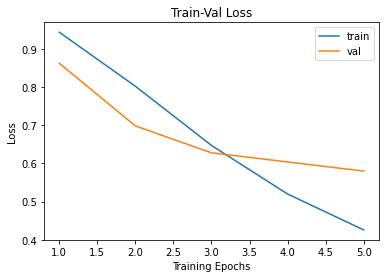

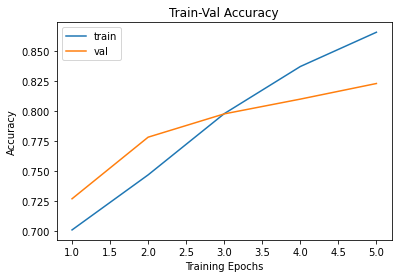

In [ ]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# Task 4

## Resnet 18 model

In [ ]:
from torchvision import models
import torch

# load model with random weights
model_resnet18 = models.resnet18(pretrained=True)

In [ ]:
print(model_resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# upload model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
from torch import nn
# change the output layer
num_classes=10
num_ftrs = model_resnet18.fc.in_features 
model_resnet18.fc = nn.Linear(num_ftrs, num_classes)

#device = torch.device("cuda:0")
model_resnet18.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:

from torchsummary import summary
summary(model_resnet18, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
model_resnet18.requires_grad_ = False
model_resnet18.fc.requires_grad_ = True

In [ ]:
loss_func = nn.CrossEntropyLoss(reduction="sum")

In [ ]:
from torch import optim
opt = optim.Adam(model_resnet18.parameters(), lr=1e-4)

In [ ]:
# get learning rate 
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0001


In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR

lr_scheduler = CosineAnnealingLR(opt,T_max=2,eta_min=1e-5)

In [ ]:
lrs=[]
for i in range(10):
    lr_scheduler.step()
    lr=get_lr(opt)
    print("epoch %s, lr: %.1e" %(i,lr))
    lrs.append(lr)

epoch 0, lr: 5.5e-05
epoch 1, lr: 1.0e-05
epoch 2, lr: 5.5e-05
epoch 3, lr: 1.0e-04
epoch 4, lr: 5.5e-05
epoch 5, lr: 1.0e-05
epoch 6, lr: 5.5e-05
epoch 7, lr: 1.0e-04
epoch 8, lr: 5.5e-05
epoch 9, lr: 1.0e-05


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


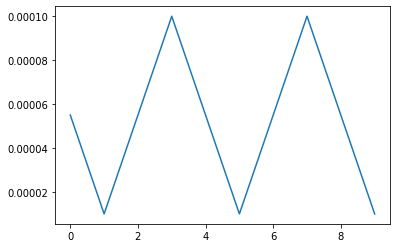

In [ ]:
plt.plot(lrs)

In [ ]:
import copy

loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model_resnet18.parameters(), lr=1e-4)
lr_scheduler = CosineAnnealingLR(opt,T_max=5,eta_min=1e-6)
#lr_scheduler = OneCycleLR(opt,max_lr=0.01,total_steps=10)

params_train={
 "num_epochs": 3,
 "optimizer": opt,
 "loss_func": loss_func,
 "train_dl": train_dl,
 "val_dl": val_dl,
 "sanity_check": False,
 "lr_scheduler": lr_scheduler,
 "path2weights": folder / "resnet18.pt",
}

# train and validate the model
model_resnet18,loss_hist,metric_hist=train_val(model_resnet18,params_train)

Epoch 0/2, current lr=0.0001
Copied best model weights!
train loss: 1.216112, dev loss: 0.884886, accuracy: 69.24
----------
Epoch 1/2, current lr=9.05463412215599e-05
Copied best model weights!
train loss: 0.868156, dev loss: 0.763244, accuracy: 73.21
----------
Epoch 2/2, current lr=6.57963412215599e-05
Copied best model weights!
train loss: 0.731573, dev loss: 0.682780, accuracy: 76.54
----------


# Test score

In [ ]:
def deploy_model(model,dataset,device, num_classes=10,sanity_check=False):

    len_data=len(dataset)
    
    # initialize output tensor on CPU: due to GPU memory limits
    y_out=torch.zeros(len_data,num_classes)
    
    # initialize ground truth on CPU: due to GPU memory limits
    y_gt=np.zeros((len_data),dtype="uint8")
    
    # move model to device
    model=model.to(device)
    
    elapsed_times=[]
    with torch.no_grad():
        for i in range(len_data):
            x,y=dataset[i]
            y_gt[i]=y
            start=time.time()    
            yy=model(x.unsqueeze(0).to(device))
            y_out[i]=torch.softmax(yy,dim=1)
            elapsed=time.time()-start
            elapsed_times.append(elapsed)

            if sanity_check is True:
                break

    inference_time=np.mean(elapsed_times)*1000
    print("average inference time per image on %s: %.2f ms " %(device,inference_time))
    return y_out.numpy(),y_gt

In [ ]:
import time
import numpy as np
from sklearn.metrics import accuracy_score

# deploy model 
y_out,y_gt=deploy_model(model_resnet18,val_ds,device=device,sanity_check=False)
y_pred = np.argmax(y_out,axis=1)
acc=accuracy_score(y_pred,y_gt)
print("accuracy of model_4 val: %.2f" %acc)


y_out,y_gt=deploy_model(model_resnet18,test_ds,device=device)

y_pred = np.argmax(y_out,axis=1)
acc=accuracy_score(y_pred,y_gt)
print("accuracy of model_4 test: %.2f" %acc)

average inference time per image on cuda:0: 5.88 ms 
accuracy of model_4 val: 0.77
average inference time per image on cuda:0: 5.89 ms 
accuracy of model_4 test: 0.77
